# Basic Options

This Notebook introduces some of the basic options such as European Options and Options which are a combination of European Options.

It also introduces the Black Scholes formula for pricing European Options.

$\textbf{Theory from a lecture at LMU by Dr. Ari-Pekka Perkkiö}$

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

import fima

In [2]:
def european_call_payoff(x, K):
    return np.maximum(x - K, 0)

def european_put_payoff(x, K):
    return np.maximum(K - x, 0)

In [3]:
x = np.linspace(0, 80, 81) # stock price
K = 40 # strike price

#black-scholes pricing formula variables
r = 0.05 # risk-free rate
sigma = 0.2 # volatility
T = 1 # time to maturity

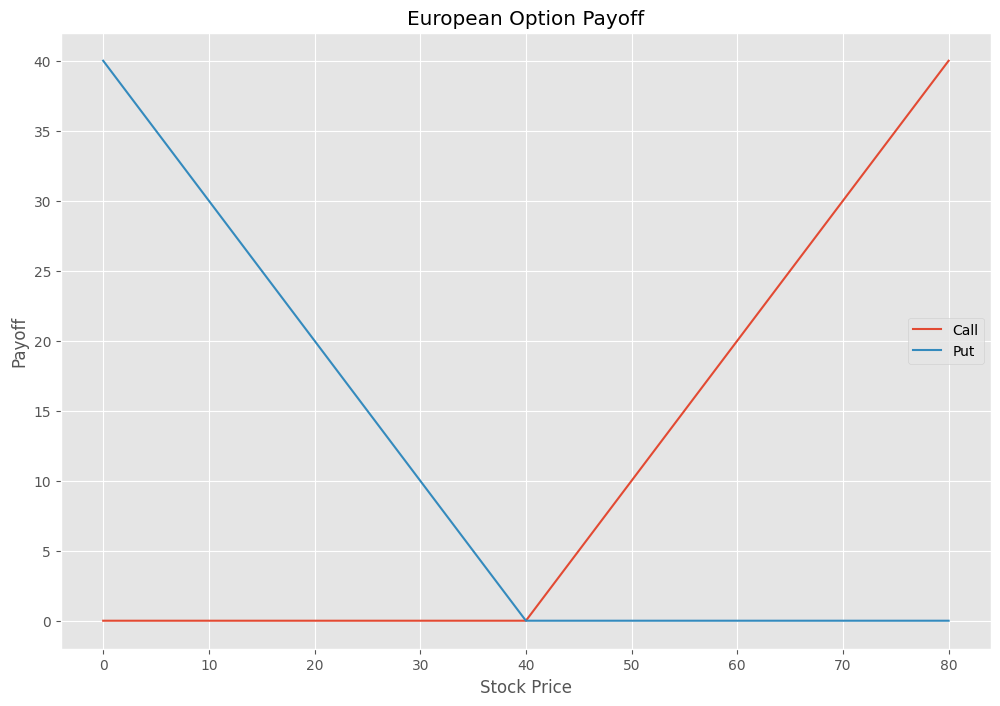

In [4]:
plt.plot(x, european_call_payoff(x, K))
plt.plot(x, european_put_payoff(x, K))
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('European Option Payoff')
plt.legend(['Call', 'Put'])
plt.show()

### Strap Payoff

A Strap is a combination of a long call and two long puts with the same strike price and expiration date.

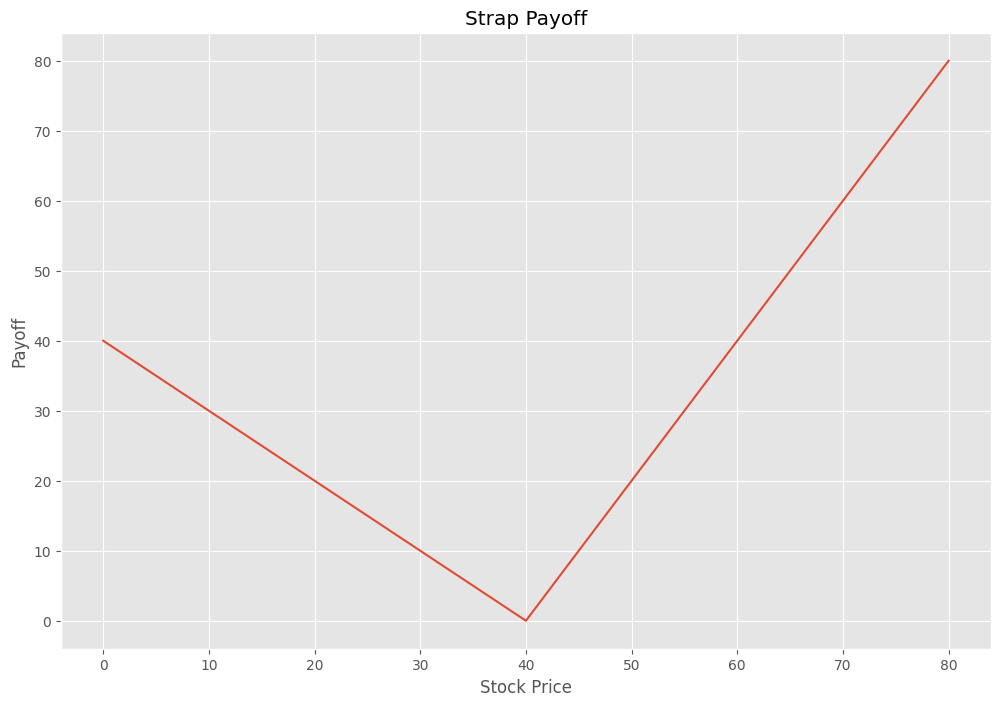

In [5]:
plt.plot(x, 2 * european_call_payoff(x, K) + european_put_payoff(x, K))
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Strap Payoff')
plt.show()

### Butterfly Payoff

A Butterfly is a combination of a long call, 2 short calls and a long call with the same expiration date and different strike prices.

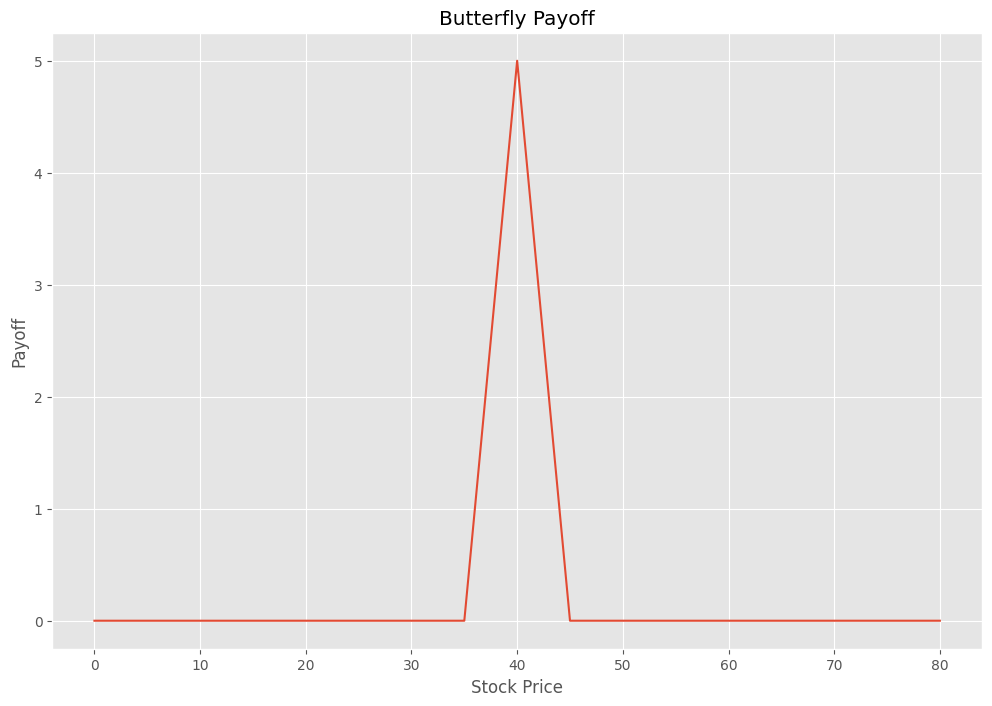

In [6]:
width = 5
plt.plot(x, european_call_payoff(x, K - width) - 2 * european_call_payoff(x, K) + european_call_payoff(x, K + width))
plt.xlabel('Stock Price')
plt.ylabel('Payoff')
plt.title('Butterfly Payoff')
plt.show()

### Black Scholes Pricing Formula for European Options

The Black Scholes formula is used to price European Options. It is based on the assumption that the underlying asset follows a Geometric Brownian Motion. 

Given a payoff function $f(S)$, the superhedging price of a vanilla Option with expiration date $T$ at time $t$ is given by:

$$E[e^{-r(T-t)} f(S_T) | S_t = S]$$

where $r$ is the risk free interest rate.

and P is the probability measure under which the underlying asset follows a Geometric Brownian Motion.

For the European Options, this can be analytically solved, but we will not go into the details of the derivation of the formula here. The formula is given by:

$$C(S,t) = S_t N(d_1) - K e^{-r(T-t)} N(d_2)$$

$$P(S,t) = K e^{-r(T-t)} N(-d_2) - S_t N(-d_1)$$

where

$$d_1 = \frac{ln(\frac{S_t}{K}) + (r + \frac{\sigma^2}{2})(T-t)}{\sigma \sqrt{T-t}}$$

$$d_2 = d_1 - \sigma \sqrt{T-t}$$

$C(S,t)$ is the price of a call option with strike price $K$ and expiration date $T$ at time $t$.

$P(S,t)$ is the price of a put option with strike price $K$ and expiration date $T$ at time $t$.

$S_t$ is the price of the underlying asset at time $t$.

$N(x)$ is the cumulative distribution function of the standard normal distribution.

$r$ is the risk free interest rate.

$\sigma$ is the volatility of the underlying asset.

$T$ is the expiration date of the option.

In [7]:
def d1(t, x, K, r, sigma, T):
    return (np.log(x/K + 1e-10) + (r + 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t) + 1e-10)

def d2(t, x, K, r, sigma, T):
    return (np.log(x/K + 1e-10) + (r - 0.5 * sigma**2) * (T - t)) / (sigma * np.sqrt(T - t) + 1e-10)

def BS_call_price(t, x, K, r, sigma, T):
    return x * scipy.stats.norm.cdf(d1(t, x, K, r, sigma, T)) - K * np.exp(-r * (T - t)) * scipy.stats.norm.cdf(d2(t, x, K, r, sigma, T))

def BS_put_price(t, x, K, r, sigma, T):
    return K * np.exp(-r * (T - t)) * scipy.stats.norm.cdf(-d2(t, x, K, r, sigma, T)) - x * scipy.stats.norm.cdf(-d1(t, x, K, r, sigma, T))

In [8]:
t = np.linspace(0, 1, 101)
x_grid, t_grid = np.meshgrid(x, t)

bs_call_price = BS_call_price(t_grid, x_grid, K, r, sigma, T)
bs_put_price = BS_put_price(t_grid, x_grid, K, r, sigma, T)

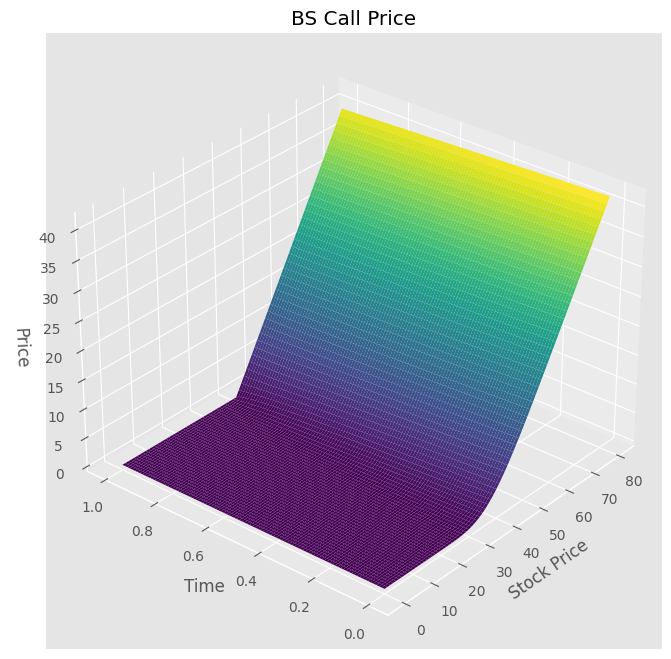

In [9]:
ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, bs_call_price, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('BS Call Price')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time')
ax.set_zlabel('Price')
ax.view_init(30, 220)
plt.show()

note the inverted Stock Price axis for the following plot

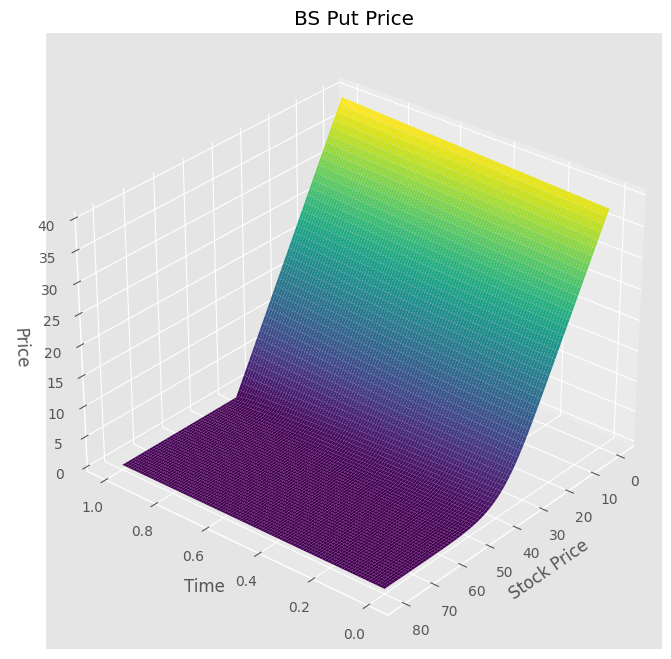

In [10]:
ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, t_grid, bs_put_price, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('BS Put Price')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time')
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_zlabel('Price')
ax.view_init(30, 40)
plt.show()

check if put call parity holds for the option

$$C - P = S - K e^{-rT}$$

where C is the call price, P is the put price, S is the stock price, K is the strike price, r is the risk-free interest rate, and T is the time to maturity.

In [11]:
S0 = 30
call_pi = BS_call_price(0, S0, K, r, sigma, T)
put_pi = BS_put_price(0, S0, K, r, sigma, T)

In [12]:
print(call_pi - put_pi, S0 - K*np.exp(-r*T))

-8.049176980028564 -8.049176980028562


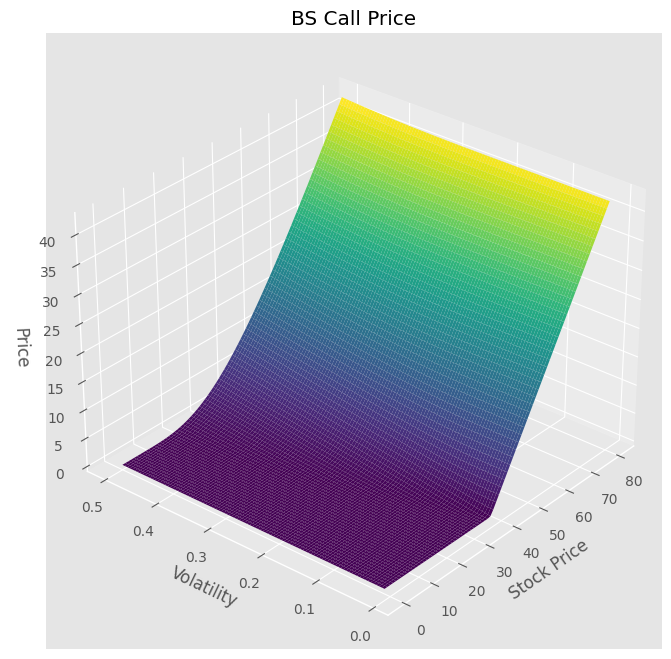

In [13]:
sigma = np.linspace(0.01, 0.5, 101)
x_grid, sigma_grid = np.meshgrid(x, sigma)

Z = BS_call_price(0, x_grid, K, r, sigma_grid, T)
ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, sigma_grid, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_title('BS Call Price')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Price')
ax.view_init(30, 220)
plt.show()

### Delta Hedging

We will no see how the delta hedge works and see if it works in discrete time.

In [14]:
def BS_call_delta(t, x, K, r = 0, sigma = 1, T = 1):
    return scipy.stats.norm.cdf(d1(t, x, K, r, sigma, T))

In [15]:
n = 1000
x0 = 100
K = 90
T = 1
mu = 0
sigma = 1

In [23]:
def delta_hedge(x0, K, r, sigma, T, n, eta):
    S = fima.GBMpaths(x0, r, sigma, T, eta)
    call_payoff = european_call_payoff(S[-1], K)

    delta = np.zeros(eta.shape)
    delta[0] = BS_call_delta(0, S[0], K, r, sigma, T)

    x = np.zeros(eta.shape)
    x[0] = BS_call_price(0, S[0], K, r, sigma, T)

    for i in range(1, eta.shape[0]):
        delta[i] = BS_call_delta(i*T/n, S[i], K, r, sigma, T)
        x[i] = x[i-1] + delta[i-1] * (S[i] - S[i-1])
    
    return call_payoff, x, delta, S

In [68]:
eta = np.random.normal(size=(n, 1))
call_payoff, x, delta, S = delta_hedge(x0, K, mu, sigma, T, n, eta)

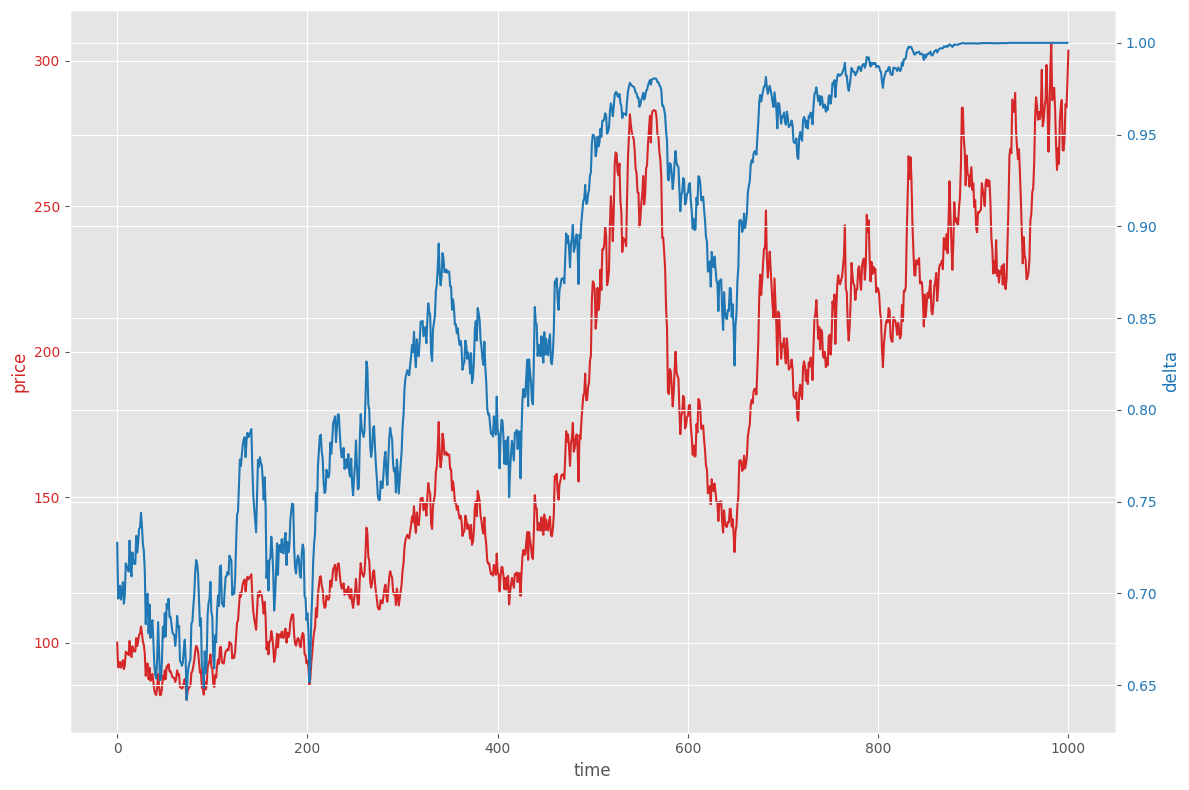

In [69]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time')
ax1.set_ylabel('price', color=color)
ax1.plot(S, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('delta', color=color)
ax2.plot(delta, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

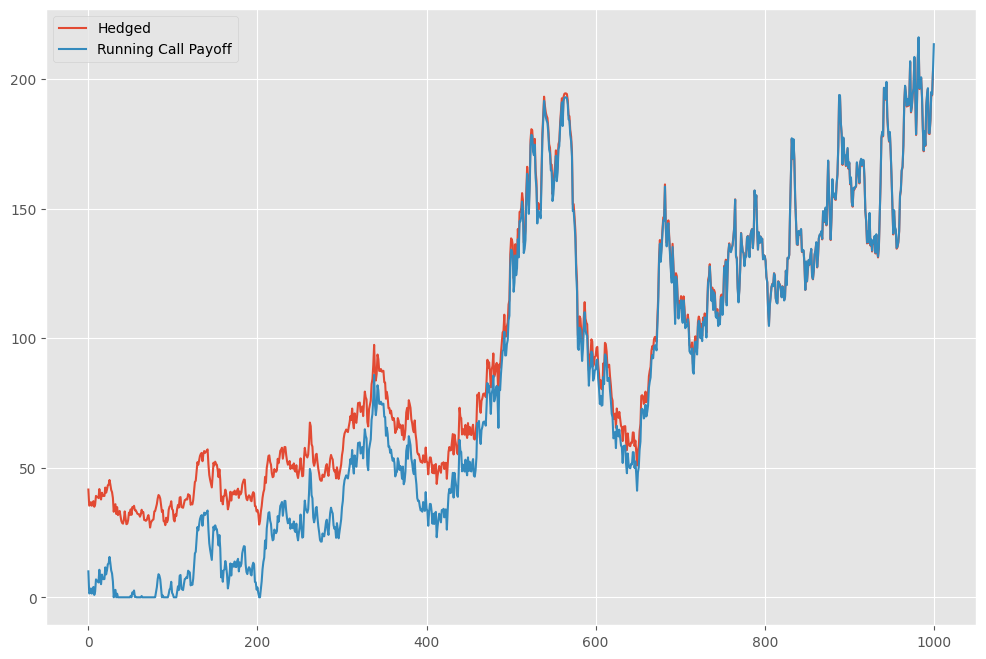

In [70]:
plt.plot(x)
plt.plot(european_call_payoff(S, K))
plt.legend(['Hedged', 'Running Call Payoff', 'Stock Price']);

In [34]:
eta = np.random.normal(size=(n, 100000))
call_payoff2, x2, delta2, S2 = delta_hedge(1, 1, mu, sigma, T, n, eta)
diff = x2[-1] - call_payoff2

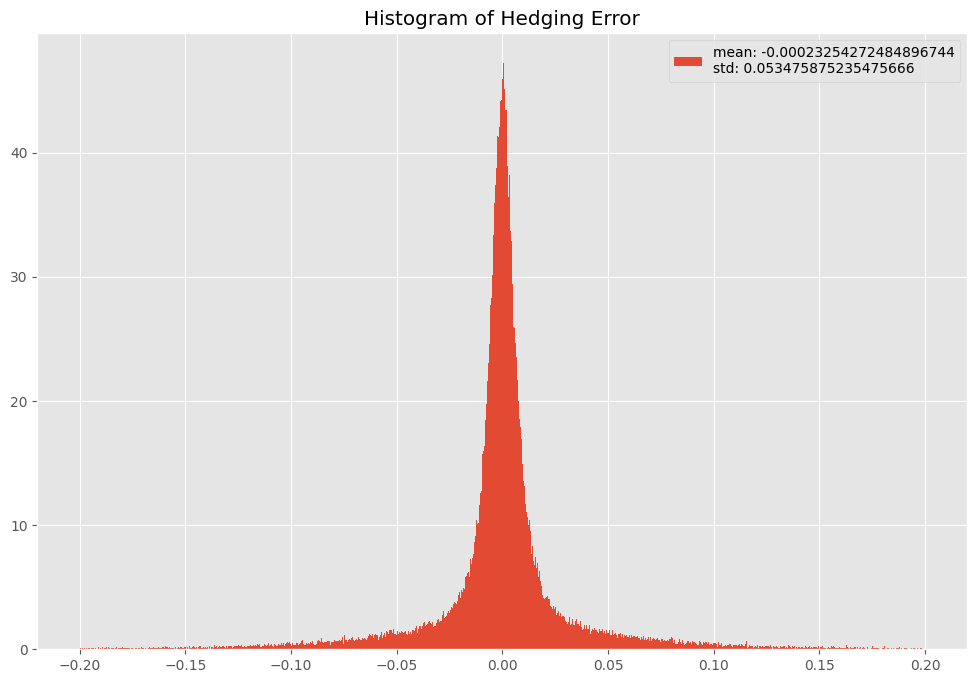

In [36]:
#crop to remove outliers
plt.hist(diff, bins=1000, density=True, range=(-0.2, 0.2))
plt.title('Histogram of Hedging Error')
plt.legend(['mean: ' + str(np.mean(diff)) + '\nstd: ' + str(np.std(diff))]);

In [37]:
eta = np.random.normal(size=(int(n/10), 100000))
call_payoff2, x2, delta2, S2 = delta_hedge(1, 1, mu, sigma, T, n, eta)
diff = x2[-1] - call_payoff2

We have decreased the number of time steps to simulate a less frequent rebalancing of the portfolio.

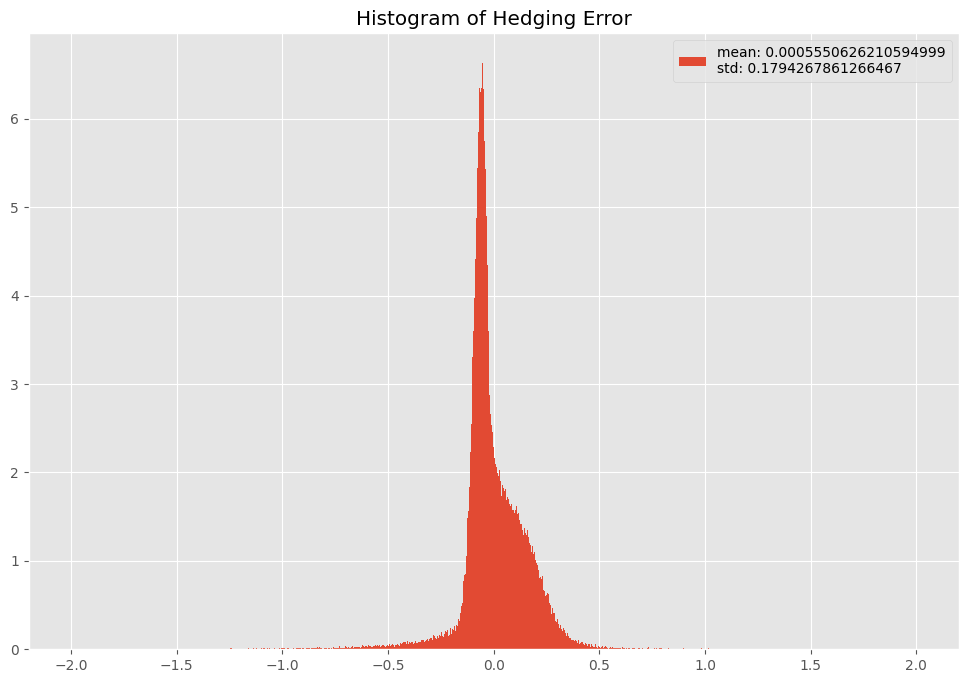

In [38]:
#crop to remove outliers
plt.hist(diff, bins=1000, density=True, range=(-2, 2))
plt.title('Histogram of Hedging Error')
plt.legend(['mean: ' + str(np.mean(diff)) + '\nstd: ' + str(np.std(diff))]);

As we can see, the delta hedge still works but the distribution is not as symmetric anymore and the standard deviation is higher.